# Predicting Charge-Off from Initial Listing Data

By Tian Mao

Oct 27, 2018

# 1. Introduction

LendingClub is a US peer-to-peer lending company and the world's largest peer-to-peer lending platform. As explained by Wikipedia.

Lending Club enables borrowers to create unsecured personal loans between  \$ 1,000 and \$ 40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.

The goal of this project is to build a machine learning model to predict the probability that a loan will charge off. We will attempt to only use data available to investors via the LendingClub loan listing, including information about the borrower (income, employment length, FICO score, debt-to-income ratio, etc.) and the loan listing (the loan amount, loan purpose, loan grade, interest rate, installment, etc.). Such a predictive model could help LendingClub investors make better-informed investment decisions. We will only consider loans that LendingClub accepted under its credit underwriting policy.

## 1.1 References

- LendingClub information
  - [LendingClub WebSite](https://www.lendingclub.com/)
  - [LendingClub Wikipedia page](https://en.wikipedia.org/wiki/Lending_Club)

- DataSets
 - [LendingClub statistics](https://www.lendingclub.com/info/download-data.action)-Original data source, aggregated on Kaggle
 - [All LendingClub loan data](https://www.kaggle.com/wordsforthewise/lending-club)-The dataset used in this project, hosted on Kaggle
 - [LendingClub Loan Data](https://www.kaggle.com/wendykan/lending-club-loan-data) -Another LendingClub dataset on Kaggle, not used in this project


- This Project
 - [GitHub Repo](https://github.com/tmaostats/LendingClubData)

# 2. Import the Data

In [5]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_row', None, 'display.max_columns',None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

Read the data into a pandas dataframe:

In [6]:
loans = pd.read_csv('D:\KaggleDatasets\\accepted_2007_to_2018Q2.csv.gz',compression='gzip',low_memory=True)

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Check basic dataframe info

In [7]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004091 entries, 0 to 2004090
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.3+ GB


In [8]:
loans.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
121238,20670000,NaN,8800.0,8800.0,8800.0,36 months,6.03,267.84,A,A1,Sales Trainer,4 years,RENT,80000.0,Not Verified,Jul-2014,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=20670000,NaN,debt_consolidation,Debt consolidation,023xx,MA,16.64,0.0,Apr-1985,775.0,779.0,0.0,NaN,NaN,16.0,0.0,4026.0,11.3,18.0,w,0.00,0.00,2739.950000,2739.95,1820.74,321.98,0.0,597.23,107.5014,Mar-2015,267.84,NaN,Oct-2016,629.0,625.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,32665.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35600.0,NaN,NaN,NaN,6.0,2042.0,8540.0,14.6,0.0,0.0,94.0,351.0,3.0,3.0,0.0,23.0,NaN,19.0,NaN,0.0,1.0,5.0,3.0,3.0,6.0,9.0,11.0,5.0,16.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,88672.0,32665.0,10000.0,50426.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1951312,128713525,NaN,3000.0,3000.0,3000.0,36 months,13.59,101.94,C,C2,Escrow Officer,1 year,RENT,32000.0,Not Verified,Feb-2018,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=128713525,NaN,debt_consolidation,Debt consolidation,838xx,ID,28.62,0.0,Aug-2012,665.0,669.0,0.0,48.0,NaN,8.0,0.0,2956.0,62.9,10.0,w,2580.49,2580.49,605.980000,605.98,419.51,186.47,0.0,0.00,0.0000,Aug-2018,101.94,Sep-2018,Aug-2018,709.0,705.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,5455.0,17106.0,0.0,5.0,1.0,2.0,9.0,14150.0,58.0,0.0,2.0,0.0,59.0,4700.0,1.0,3.0,1.0,4.0,2138.0,NaN,NaN,0.0,0.0,66.0,59.0,17.0,9.0,0.0,NaN,NaN,12.0,48.0,0.0,0.0,3.0,0.0,0.0,7.0,3.0,3.0,3.0,8.0,0.0,0.0,0.0,1.0,90.0,NaN,0.0,0.0,29049.0

# 3. Response Variables

We're going to try to predict the loan_status variable. What are the value counts for this variables?

In [9]:
loans['loan_status'].value_counts(dropna=False)

Current                                                1108697
Fully Paid                                              673112
Charged Off                                             170822
Late (31-120 days)                                       27678
In Grace Period                                          13775
Late (16-30 days)                                         7157
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     72
NaN                                                         29
Name: loan_status, dtype: int64

We're going to try to learn differences in the features between completed loans that have been fully paid or charged off. We won't consider loans that are current, don't meet the credit policy, defaulted, or have a missing status. So we only keep the loans with status "Fully Paid" or "Charged Off."

In [10]:
loans = loans.loc[loans['loan_status'].isin(['Fully Paid', 'Charged Off'])]

How many loans remain in the dataset?

In [11]:
loans.shape

(843934, 151)

There are 673,112 loans remaining. Check that the statuses are as expected:

In [12]:
loans['loan_status'].value_counts(dropna=False)

Fully Paid     673112
Charged Off    170822
Name: loan_status, dtype: int64

Status counts as percentages:

In [13]:
loans['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid     0.797588
Charged Off    0.202412
Name: loan_status, dtype: float64

About 79% of the remaining loans have been fully paid and 21% have charged off, so we have a somewhat unbalanced classification problem.

# 4. Limit the Feature Space

The full dataset has 150 features for each loan. We'll select features in two steps:

 1.Drop features with more than 30% of their data missing.
 
 2.Of the remaining features, choose only those that would be available to an investor before deciding to fund the loan.
 
Definitions of the features are given in the LendingClub Data Dictionary available here.

## 4.1 Drop features missing more than 30% of data

First calculate the percentage of missing data for each feature:

In [14]:
missing_fractions = loans.isnull().mean().sort_values(ascending=False)

Top 10 features missing the most data:

In [15]:
missing_fractions.head(10)

member_id                                     1.000000
next_pymnt_d                                  1.000000
orig_projected_additional_accrued_interest    0.999879
hardship_start_date                           0.999297
hardship_length                               0.999297
hardship_type                                 0.999297
hardship_reason                               0.999297
hardship_status                               0.999297
deferral_term                                 0.999297
hardship_amount                               0.999297
dtype: float64

Let's visualize the distribution of missing data percentages:

Text(0,0.5,'Feature count')

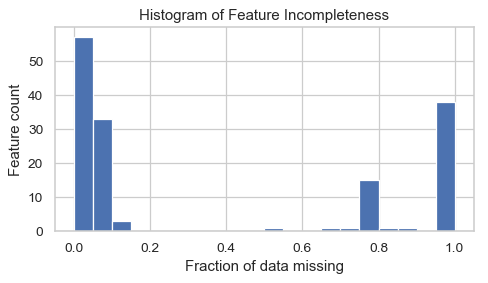

In [16]:
plt.figure(figsize=(6,3), dpi=90)
missing_fractions.plot.hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

From the above histogram, we see there's a large gap between features missing "some" data (<20%) and those missing "lots" of data (>40%). Because it's generally very difficult to accurately impute data with more than 30% missing values, we drop such columns. First store all variables missing more than 30% data in an alphabetical list:

In [17]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
print(drop_list)

['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_ma

How many features will be dropped?

In [18]:
len(drop_list)

58

Drop these features:

In [19]:
loans.drop(labels=drop_list, axis=1, inplace=True)

In [20]:
loans.shape

(843934, 93)

## 4.2 Only keep loan features known to potential investors

We examine the LendingClub website and Data Dictionary to determine which features would have been available to potential investors. Here's the list of features we currently have, in alphabetical order:

In [21]:
print(sorted(loans.columns))

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'id', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sa

For each of these features, we check the description in the Data Dictionary and only keep the features that would have been available to investors considering an investment in the loan. These include features in the loan application, and any features added by LendingClub when the loan listing was accepted, such as the loan grade and interest rate.

I'm using my best available knowledge to determine which loan features are known to potential investors. I am not an investor on LendingClub, so my knowledge of the LendingClub investment process is not exact. When in doubt, I err on the side of dropping the feature.

In [22]:
keep_list = ['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']

In [23]:
len(keep_list)

31

The list of features to drop is any feature not in keep_list:

In [24]:
drop_list = [col for col in loans.columns if col not in keep_list]
print(drop_list)

['funded_amnt', 'funded_amnt_inv', 'pymnt_plan', 'url', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc

In [25]:
len(drop_list)

62

Drop these features:

In [26]:
loans.drop(labels=drop_list, axis=1, inplace=True)

In [27]:
loans.shape

(843934, 31)

# 5. Pre-Processing and Exploratory Data Analysis

We'll inspect each feature individually, and do the following:

1. Drop the feature if it is not useful for predicting the loan status.
2. View summary statistics and visualize the data, plotting against the loan status.
3. Modify the feature to make it useful for modeling, if necessary.

We define a function for plotting a variable and comparing with the loan status:

In [28]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(loans.loc[loans[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(loans[col_name], order=sorted(loans[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=loans, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = loans.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

Print the remaining features for future reference:

In [29]:
print(list(loans.columns))

['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies']


## 5.1 id 

Data Dictionary: "A unique [LendingClub] assigned ID for the loan listing."

In [30]:
loans['id'].sample(5)

499570    54128169
965054     1437472
534862    51316586
52232     28744341
35478     33240236
Name: id, dtype: object

Are all the IDs unique?

In [31]:
loans['id'].describe()

count       843934
unique      843934
top       14680062
freq             1
Name: id, dtype: int64

Yes, they are all unique. The ID is not useful for modeling, either as a categorical variable (there are too many distinct values) or as a numerical variable (the IDs vary wildly in magnitude, likely without any significance), so we drop this variable.

In [32]:
loans.drop('id', axis=1, inplace=True)

## 5.2 loan_amt

Data Dictionary: "The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."

In [33]:
loans['loan_amnt'].describe()

count    843934.000000
mean      14322.610506
std        8560.537426
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

Loan amounts range from \$500 to \$40,000, with a median of \$12,000.

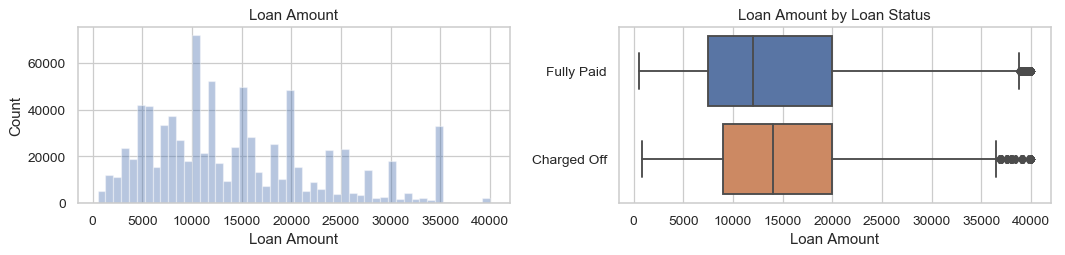

In [34]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)

Charged-off loans tend to have higher loan amounts. Let's compare the summary statistics by loan status:

In [35]:
loans.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,170822.0,15406.261781,8642.300220,900.0,9000.0,14000.0,20000.0,40000.0
Fully Paid,673112.0,14047.602071,8517.764613,500.0,7500.0,12000.0,20000.0,40000.0


## 5.3 term

Data Dictionary: "The number of payments on the loan. Values are in months and can be either 36 or 60."

In [36]:
loans['term'].value_counts(dropna=False)

 36 months    639560
 60 months    204374
Name: term, dtype: int64

Convert term to integers.

In [37]:
loans['term'] = loans['term'].apply(lambda s: np.int8(s.split()[0]))

In [38]:
loans['term'].value_counts(normalize=True)

36    0.757832
60    0.242168
Name: term, dtype: float64

Compare the charge-off rate by loan period:

In [39]:
loans.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
36    0.162901
60    0.326054
Name: loan_status, dtype: float64

About 76% of the completed loans have three-year periods, and the rest have five-year periods. Loans with five-year periods are more than twice as likely to charge-off as loans with three-year periods.

## 5.4 int_rate

Data Dictionary: "Interest Rate on the loan."

In [40]:
loans['int_rate'].describe()

count    843934.00000
mean         13.48929
std           4.65430
min           5.31000
25%           9.99000
50%          13.05000
75%          16.29000
max          30.99000
Name: int_rate, dtype: float64

Interest rates range from 5.32% to 30.99%  with a median of 13.1%.

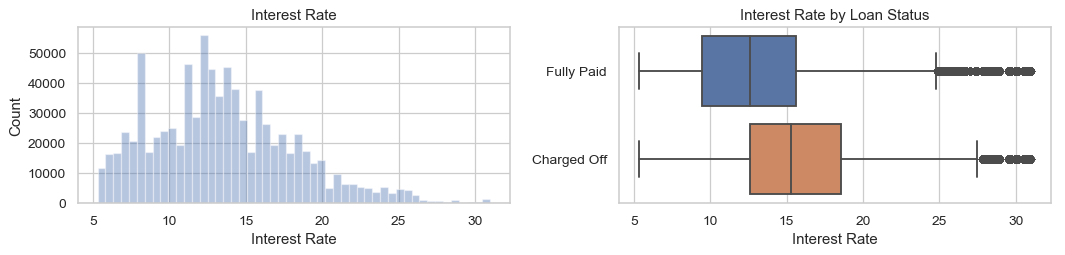

In [41]:
plot_var('int_rate', 'Interest Rate', continuous=True)

Charged-off loans tend to have much higher interest rates. Let's compare the summary statistics by loan status:

In [42]:
loans.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,170822.0,15.748976,4.653612,5.31,12.59,15.31,18.55,30.99
Fully Paid,673112.0,12.915829,4.476546,5.31,9.49,12.62,15.61,30.99


## 5.5 installment

Data Dictionary: "The monthly payment owed by the borrower if the loan originates."

In [43]:
loans['installment'].describe()

count    843934.000000
mean        436.635541
std         257.153274
min           4.930000
25%         250.330000
50%         376.180000
75%         576.670000
max        1714.540000
Name: installment, dtype: float64

Installments range from \$4.93 to \$1,714, with a median of \$377.

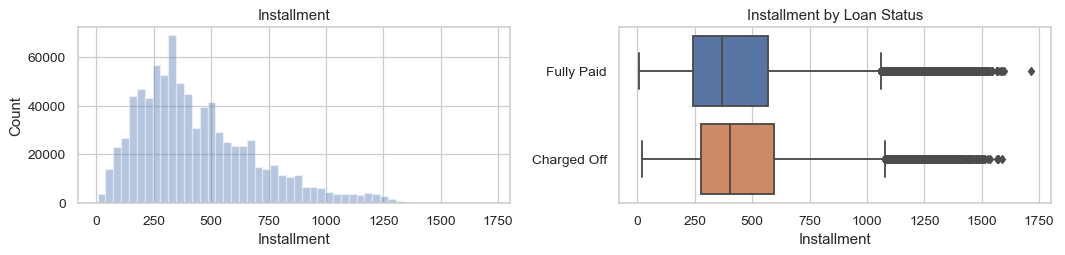

In [44]:
plot_var('installment', 'Installment', continuous=True)

Charged-off loans tend to have higher installments. Let's compare the summary statistics by loan status:

In [45]:
loans.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,170822.0,460.741907,256.547221,21.62,275.96,402.54,597.0375,1587.23
Fully Paid,673112.0,430.517840,256.947488,4.93,243.49,369.99,570.2700,1714.54


Loans that charge off have $30 higher installments on average.

## 5.6 grade, sub_grade

Data Dictionary for grade: "LendingClub assigned loan grade."

Data Dictionary for sub_grade: "LendingClub assigned loan subgrade."

What are the possible values of grade and sub_grade?

In [46]:
print(sorted(loans['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [47]:
print(sorted(loans['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


The grade is implied by the subgrade, so let's drop the grade column.

In [48]:
loans.drop('grade', axis=1, inplace=True)

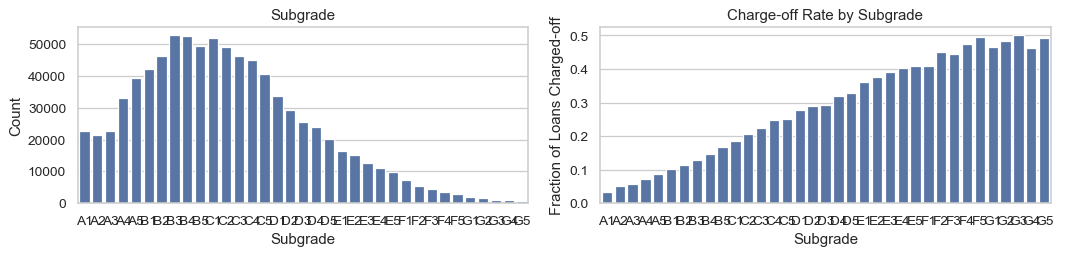

In [49]:
plot_var('sub_grade', 'Subgrade', continuous=False)

There's a clear trend of higher probability of charge-off as the subgrade worsens.

## 5.7 emp_title

Data Dictionary: "The job title supplied by the Borrower when applying for the loan."

In [50]:
loans['emp_title'].describe()

count      793091
unique     285659
top       Teacher
freq        11859
Name: emp_title, dtype: object

There are too many different job titles for this feature to be useful, so we drop it.

In [51]:
loans.drop(labels='emp_title', axis=1, inplace=True)

## 5.8 emp_length

Data Dictionary: "Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years." The actual data does not match this description:

In [52]:
loans['emp_length'].value_counts(dropna=False).sort_index()

1 year        55268
10+ years    274713
2 years       76026
3 years       67257
4 years       50521
5 years       53943
6 years       41495
7 years       40516
8 years       39714
9 years       32763
< 1 year      67231
NaN           44487
Name: emp_length, dtype: int64

Note there are 42,253 loans without data on the length of employment.

Convert emp_length to integers:

In [53]:
loans['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)

In [54]:
loans['emp_length'].replace('< 1 year', '0 years', inplace=True)

In [55]:
def emp_length_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

In [56]:
loans['emp_length'] = loans['emp_length'].apply(emp_length_to_int)

In [57]:
loans['emp_length'].value_counts(dropna=False).sort_index()

 0.0      67231
 1.0      55268
 2.0      76026
 3.0      67257
 4.0      50521
 5.0      53943
 6.0      41495
 7.0      40516
 8.0      39714
 9.0      32763
 10.0    274713
NaN       44487
Name: emp_length, dtype: int64

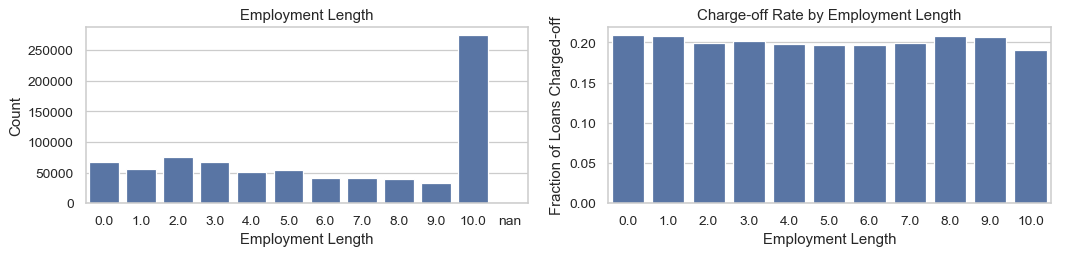

In [58]:
plot_var('emp_length', 'Employment Length', continuous=False)

Loan status does not appear to vary much with employment length on average, except for a small drop in charge-offs for borrowers with over 10 years of employment.

## 5.9 hone_ownership

Data Dictionary: "The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER."

In [104]:
loans['home_ownership'].value_counts(dropna=False)

MORTGAGE    421601
RENT        335188
OWN          86860
OTHER          144
ANY             95
NONE            46
Name: home_ownership, dtype: int64

Replace the values ANY and NONE with OTHER:

In [59]:
loans['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

In [60]:
loans['home_ownership'].value_counts(dropna=False)

MORTGAGE    421601
RENT        335188
OWN          86860
OTHER          285
Name: home_ownership, dtype: int64

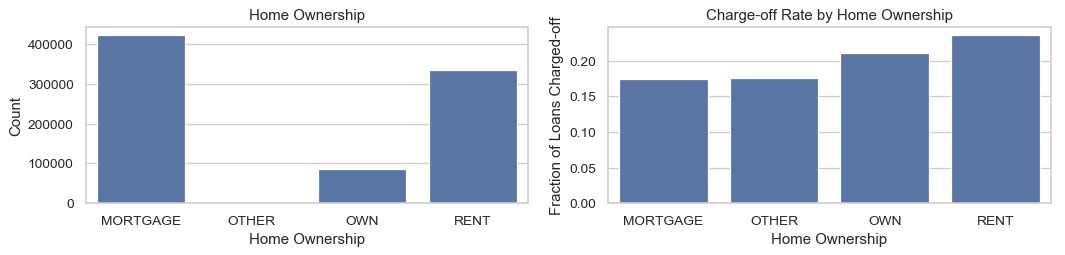

In [61]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

There appear to be large differences in charge-off rates by home ownership status. Renters and homeowners have a higher probability of charge-off. Let's compare the charge-off rates:

In [62]:
loans.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

home_ownership
MORTGAGE    0.174179
OTHER       0.175439
OWN         0.210730
RENT        0.235790
Name: loan_status, dtype: float64

## 5.10 annual_inc

Data Dictionary: "The self-reported annual income provided by the borrower during registration."

In [63]:
loans['annual_inc'].describe()

count    8.439340e+05
mean     7.543727e+04
std      6.706228e+04
min      0.000000e+00
25%      4.531410e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.550000e+06
Name: annual_inc, dtype: float64

Annual income ranges from \$0 to \$9,550,000, with a median of \$65,000. Because of the large range of incomes, we should take a log transform of the annual income variable.

In [64]:
loans['log_annual_inc'] = loans['annual_inc'].apply(lambda x: np.log10(x+1))

In [65]:
loans.drop('annual_inc', axis=1, inplace=True)

In [66]:
loans['log_annual_inc'].describe()

count    843934.000000
mean          4.811100
std           0.236227
min           0.000000
25%           4.656243
50%           4.812920
75%           4.954247
max           6.980003
Name: log_annual_inc, dtype: float64

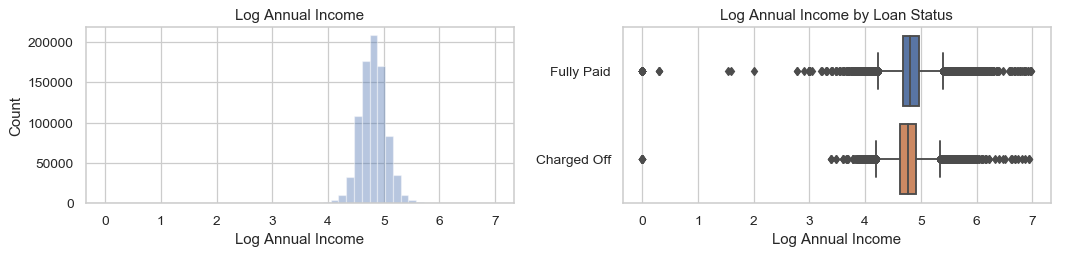

In [67]:
plot_var('log_annual_inc', 'Log Annual Income', continuous=True)

It appears that individuals with higher income are more likely to pay off their loans. Let's compare the summary statistics by loan status:

In [68]:
loans.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,170822.0,4.777170,0.228583,0.0,4.632108,4.778158,4.917511,6.949393
Fully Paid,673112.0,4.819711,0.237357,0.0,4.672107,4.812920,4.963793,6.980003


## 5.11 verification_status

Data Dictionary: "Indicates if income was verified by [Lending Club], not verified, or if the income source was verified."

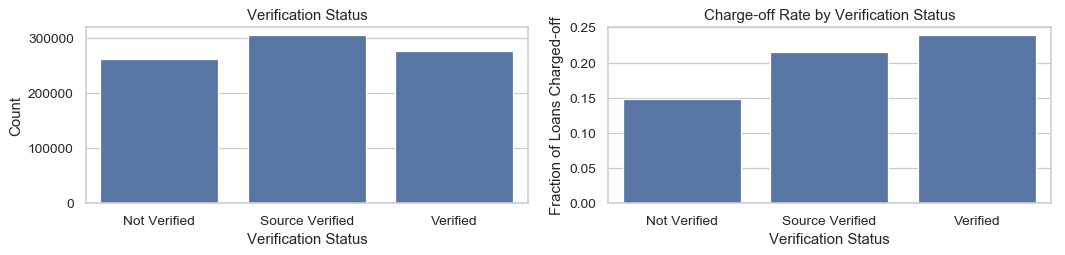

In [69]:
plot_var('verification_status', 'Verification Status', continuous=False)

## 5.12 issue_d

Data Dictionary: "The month which the loan was funded."

Because we're only using variables available to investors before the loan was funded, issue_d will not be included in the final model. We're keeping it for now just to perform the train/test split later, then we'll drop it.

## 5.13 purpose

Data Dictionary: "A category provided by the borrower for the loan request."

In [70]:
loans['purpose'].value_counts()

debt_consolidation    496155
credit_card           180473
home_improvement       53201
other                  47066
major_purchase         18436
small_business         10531
car                     9393
medical                 9388
moving                  6005
vacation                5401
house                   4665
wedding                 2273
renewable_energy         621
educational              326
Name: purpose, dtype: int64

Calculate the charge-off rates by purpose:

In [71]:
loans.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

purpose
wedding               0.122305
car                   0.143831
educational           0.171779
credit_card           0.175350
home_improvement      0.177421
major_purchase        0.180028
vacation              0.192742
house                 0.197856
other                 0.209196
debt_consolidation    0.213808
medical               0.223370
moving                0.238468
renewable_energy      0.244767
small_business        0.300066
Name: loan_status, dtype: float64

Notice that only 12% of completed loans for weddings have charged-off, but 30% of completed small business loans have charged-off.

## 5.14 title

Data Dictionary: "The loan title provided by the borrower."

In [72]:
loans['title'].describe()

count                 836016
unique                 60298
top       Debt consolidation
freq                  386377
Name: title, dtype: object

View the top 10 loan titles, and their frequencies:

In [73]:
loans['title'].value_counts().head(10)

Debt consolidation         386377
Credit card refinancing    138684
Home improvement            41579
Other                       36432
Debt Consolidation          15059
Major purchase              13284
Medical expenses             7524
Business                     6983
Car financing                6124
Consolidation                5090
Name: title, dtype: int64

There are 60,298 different titles in the dataset, and based on the top 10 titles, the purpose variable appears to already contain this information. So we drop the title variable.

In [74]:
loans.drop('title', axis=1, inplace=True)

## 5.15 zip_code, addr_state

Data Dictionary for zip_code: "The first 3 numbers of the zip code provided by the borrower in the loan application."

Data Dictionary for addr_state: "The state provided by the borrower in the loan application."

In [75]:
loans['zip_code'].sample(5)

918341    926xx
158019    750xx
130054    437xx
120867    968xx
59297     953xx
Name: zip_code, dtype: object

In [76]:
loans['zip_code'].nunique()

927

In [77]:
loans['addr_state'].sample(5)

1856204    IL
974664     MN
168552     OR
597895     CA
662169     NY
Name: addr_state, dtype: object

In [78]:
loans['addr_state'].nunique()

51

There are a lot of different zip codes, so let's just keep the state column.

In [79]:
loans.drop(labels='zip_code', axis=1, inplace=True)

Calculate the charge-off rates by address state:

In [80]:
loans.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

addr_state
ME    0.125802
DC    0.128620
NH    0.140010
IA    0.142857
VT    0.143921
OR    0.150093
CO    0.154066
WA    0.162840
KS    0.168423
SC    0.168718
ID    0.172026
WI    0.172789
MT    0.173069
UT    0.174236
WY    0.175159
WV    0.179495
CT    0.180487
GA    0.187858
RI    0.189674
MA    0.190089
IL    0.190110
AZ    0.193777
CA    0.195150
TX    0.198404
HI    0.199008
DE    0.201630
AK    0.202063
VA    0.204031
MI    0.204952
MN    0.206979
NC    0.210573
MD    0.210827
PA    0.211031
KY    0.212292
NJ    0.212702
MO    0.215269
FL    0.217893
SD    0.220690
NM    0.221453
OH    0.221529
ND    0.222561
NY    0.223384
IN    0.223467
TN    0.224601
NV    0.229201
LA    0.235091
AR    0.239218
AL    0.243637
OK    0.244268
NE    0.252288
MS    0.268757
Name: loan_status, dtype: float64

The charge-off rate ranges from 13.0% in Washington, DC to 27.6% in Mississippi.

## 5.16 dti

Data Dictionary: "A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."

In [81]:
loans['dti'].describe()

count    843838.000000
mean         17.883212
std           9.481950
min          -1.000000
25%          11.590000
50%          17.330000
75%          23.630000
max         999.000000
Name: dti, dtype: float64

Note sure if the values of -1 and 999 make sense...

There are several outliers that mess up our default plots. Plot a histogram for dti less than 60:

Text(0.5,1,'Debt-to-income Ratio')

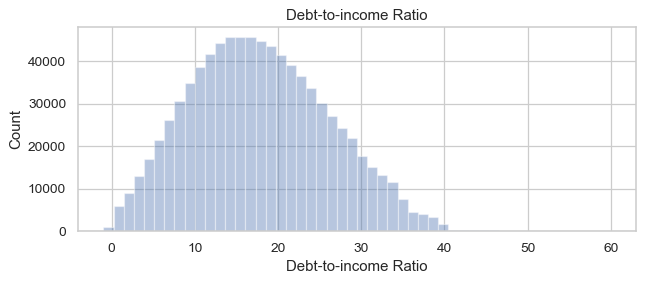

In [82]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(loans.loc[loans['dti'].notnull() & (loans['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

How many of the dti values are "outliers" (above 60)?

In [83]:
(loans['dti']>=60).sum()

418

Very few. Compare the summary statistics by loan status:

In [84]:
loans.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,170813.0,20.003621,9.254917,0.0,13.60,19.75,26.21,999.0
Fully Paid,673025.0,17.345055,9.463425,-1.0,11.18,16.76,22.92,999.0


Completed loans that are charged off tend to have higher debt-to-income ratios.

## 5.17 earliest_cr_line

Data Dictionary: "The month the borrower's earliest reported credit line was opened."

In [85]:
loans['earliest_cr_line'].sample(5)

21387      Sep-1977
1535660    Jun-2005
812677     May-2005
1880820    Aug-1980
219552     Jan-1996
Name: earliest_cr_line, dtype: object

In [86]:
loans['earliest_cr_line'].isnull().any()

False

Let's just retain the year for simplicity:

In [87]:
loans['earliest_cr_line'] = loans['earliest_cr_line'].apply(lambda s: int(s[-4:]))

In [88]:
loans['earliest_cr_line'].describe()

count    843934.000000
mean       1998.280322
std           7.415208
min        1944.000000
25%        1995.000000
50%        2000.000000
75%        2003.000000
max        2015.000000
Name: earliest_cr_line, dtype: float64

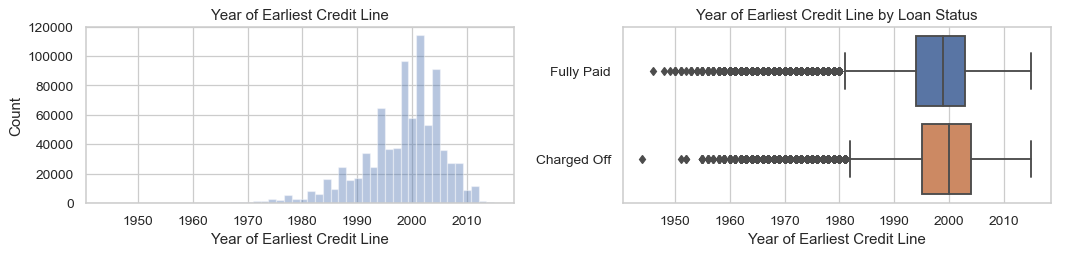

In [89]:
plot_var('earliest_cr_line', 'Year of Earliest Credit Line', continuous=True)

Borrowers who are charged-off tend to have shorter lines of credit.

## 5.18 fico_range_low, fico_range_high

Data Dictionary for fico_range_low: "The lower boundary range the borrower’s FICO at loan origination belongs to."

Data Dictionary for fico_range_high: "The upper boundary range the borrower’s FICO at loan origination belongs to."

In [90]:
loans[['fico_range_low', 'fico_range_high']].describe()

,fico_range_low,fico_range_high
count,843934.000000,843934.000000
mean,696.054063,700.054186
std,31.704167,31.704742
min,625.000000,629.000000
25%,670.000000,674.000000
50%,690.000000,694.000000
75%,710.000000,714.000000
max,845.000000,850.000000


Check the Pearson correlation between these values:

In [91]:
loans[['fico_range_low','fico_range_high']].corr()

,fico_range_low,fico_range_high
fico_range_low,1.0,1.0
fico_range_high,1.0,1.0


We only need to keep one of the FICO scores. We'll take the average of the two and call it fico_score:

In [92]:
loans['fico_score'] = 0.5*loans['fico_range_low'] + 0.5*loans['fico_range_high']

In [93]:
loans.drop(['fico_range_high', 'fico_range_low'], axis=1, inplace=True)

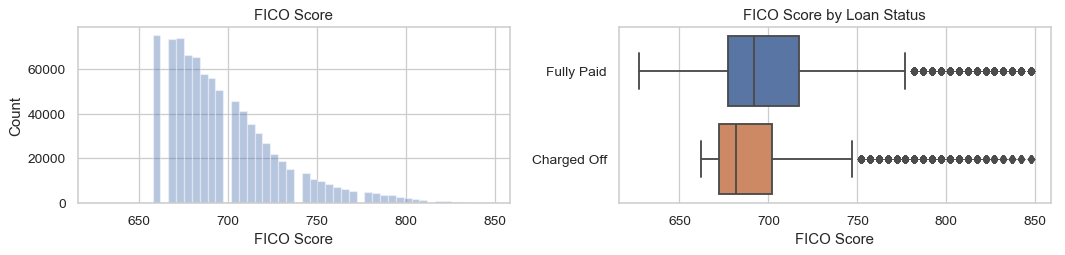

In [94]:
plot_var('fico_score', 'FICO Score', continuous=True)

There is a noticeable difference in FICO scores between fully paid and charged-off loans. Compare the summary statistics:

In [95]:
loans.groupby('loan_status')['fico_score'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,170822.0,689.272857,25.377774,662.0,672.0,682.0,702.0,847.5
Fully Paid,673112.0,700.282630,32.745813,627.0,677.0,692.0,717.0,847.5


Loans that charge off have a FICO score 10 points lower on average.

## 5.19 open_acc

Data Dictionary: "The number of open credit lines in the borrower's credit file."

Text(0.5,1,'Number of Open Credit Lines')

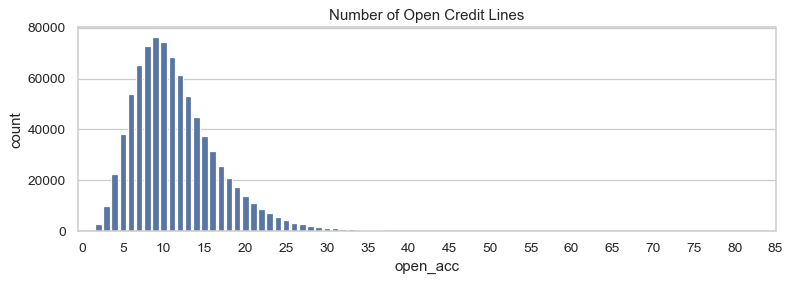

In [96]:
plt.figure(figsize=(10,3), dpi=90)
sns.countplot(loans['open_acc'], order=sorted(loans['open_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 90, 5), np.arange(0, 90, 5))
plt.title('Number of Open Credit Lines')

Is there a difference in number of credit lines between fully paid loans and charged-off loans?

In [97]:
loans.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,170822.0,11.864906,5.520860,0.0,8.0,11.0,15.0,76.0
Fully Paid,673112.0,11.427652,5.293064,0.0,8.0,10.0,14.0,90.0


## 5.20 pub_rec

Data Dictionary: "Number of derogatory public records."

In [98]:
loans['pub_rec'].value_counts().sort_index()

0.0     705901
1.0     116773
2.0      14292
3.0       4155
4.0       1420
5.0        664
6.0        342
7.0        148
8.0         90
9.0         44
10.0        28
11.0        24
12.0        15
13.0        11
14.0         2
15.0         5
16.0         2
17.0         1
18.0         3
19.0         2
21.0         1
24.0         1
28.0         2
34.0         1
40.0         1
46.0         1
49.0         2
54.0         1
63.0         1
86.0         1
Name: pub_rec, dtype: int64

Is there a difference in average public records between fully paid loans and charged-off loans?

In [99]:
loans.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,170822.0,0.231539,0.638699,0.0,0.0,0.0,0.0,86.0
Fully Paid,673112.0,0.197749,0.564713,0.0,0.0,0.0,0.0,63.0


## 5.21 revol_bal

Data Dictionary: "Total credit revolving balance."

In [100]:
loans['revol_bal'].describe()

count    8.439340e+05
mean     1.601804e+04
std      2.167554e+04
min      0.000000e+00
25%      5.945250e+03
50%      1.111600e+04
75%      1.965100e+04
max      2.568995e+06
Name: revol_bal, dtype: float64

Do a log transform:

In [101]:
loans['log_revol_bal'] = loans['revol_bal'].apply(lambda x: np.log10(x+1))

In [102]:
loans.drop('revol_bal', axis=1, inplace=True)

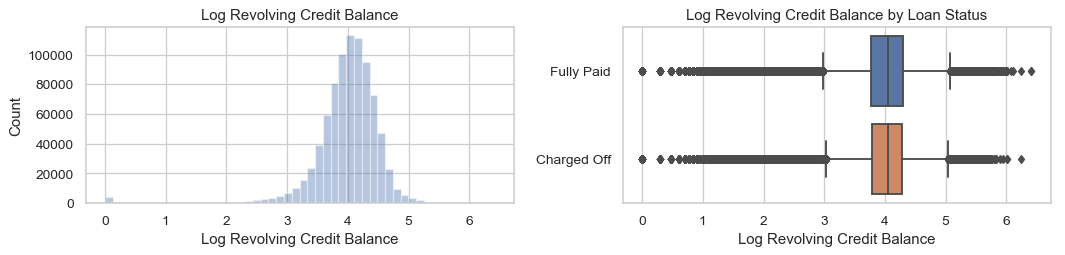

In [103]:
plot_var('log_revol_bal', 'Log Revolving Credit Balance', continuous=True)

In [104]:
loans.groupby('loan_status')['log_revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,170822.0,3.994594,0.504839,0.0,3.785276,4.050244,4.287930,6.242223
Fully Paid,673112.0,3.988579,0.537872,0.0,3.771587,4.044814,4.294863,6.409763


There isn't a large difference in the means.

## 5.22 revol_util

Data Dictionary: "Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."

In [105]:
loans['revol_util'].describe()

count    843395.000000
mean         52.565800
std          24.498415
min           0.000000
25%          34.300000
50%          53.200000
75%          71.600000
max         892.300000
Name: revol_util, dtype: float64

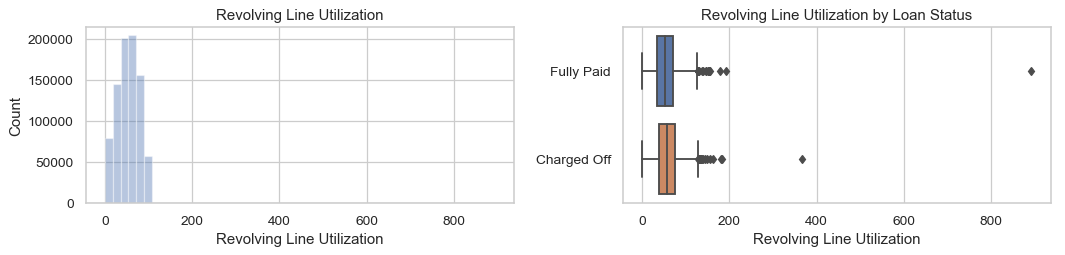

In [106]:
plot_var('revol_util', 'Revolving Line Utilization', continuous=True)

In [107]:
loans.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,170704.0,56.255905,23.675262,0.0,39.2,57.3,74.6,366.6
Fully Paid,672691.0,51.629388,24.615111,0.0,33.2,52.1,70.7,892.3


## 5.23 total_acc

Data Dictionary: "The total number of credit lines currently in the borrower's credit file."

Text(0.5,1,'Total Number of Credit Lines')

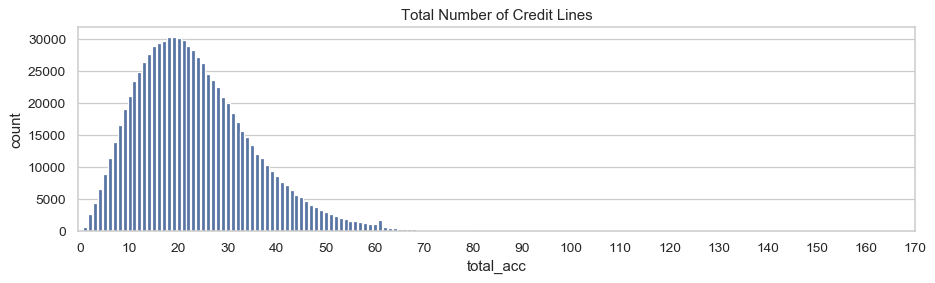

In [108]:
plt.figure(figsize=(12,3), dpi=90)
sns.countplot(loans['total_acc'], order=sorted(loans['total_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 176, 10), np.arange(0, 176, 10))
plt.title('Total Number of Credit Lines')

In [109]:
loans.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,170822.0,25.104108,12.128061,2.0,16.0,23.0,32.0,176.0
Fully Paid,673112.0,25.457705,11.965079,2.0,17.0,24.0,32.0,156.0


No large differences here.

## 5.24 initial_list_status

Data Dictionary: "The initial listing status of the loan. Possible values are – W, F." I'm not sure what this means.

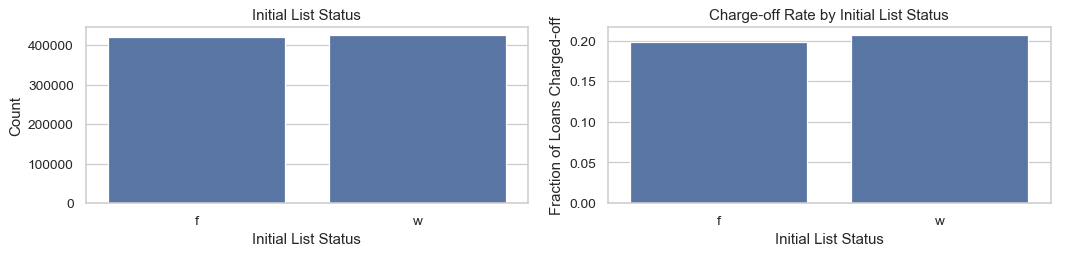

In [110]:
plot_var('initial_list_status', 'Initial List Status', continuous=False)

## 5.25 application_type

Data Dictionary: "Indicates whether the loan is an individual application or a joint application with two co-borrowers."

In [111]:
loans['application_type'].value_counts()

Individual    836760
Joint App       7174
Name: application_type, dtype: int64

Let's just compare the charge-off rates by application type:

In [112]:
loans.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

application_type
Individual    0.202801
Joint App     0.156956
Name: loan_status, dtype: float64

Joint loans are slightly less likely to be charged-off.

## 5.26 mort_acc

Data Dictionary: "Number of mortgage accounts."

In [113]:
loans['mort_acc'].describe()

count    796653.000000
mean          1.752609
std           2.074195
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          51.000000
Name: mort_acc, dtype: float64

Not sure how someone can have 51 mortgage accounts...but apparently they do. Check the top 10 values:

In [114]:
loans['mort_acc'].value_counts().head(10)

0.0    312861
1.0    137154
2.0    114568
3.0     85928
4.0     60742
5.0     38204
6.0     22389
7.0     11851
8.0      6033
9.0      3130
Name: mort_acc, dtype: int64

Compare the summary statistics by loan status:

In [115]:
loans.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,163936.0,1.443612,1.89873,0.0,0.0,1.0,2.0,29.0
Fully Paid,632717.0,1.832669,2.10992,0.0,0.0,1.0,3.0,51.0


Individuals who pay off their loans are more likely to have several mortgage accounts.

## 5.27 pub_rec_bankruptcies

Data Dictionary: "Number of public record bankruptcies."

In [116]:
loans['pub_rec_bankruptcies'].value_counts().sort_index()

0.0     739410
1.0      97817
2.0       4710
3.0        932
4.0        234
5.0         85
6.0         28
7.0         14
8.0          5
9.0          1
12.0         1
Name: pub_rec_bankruptcies, dtype: int64

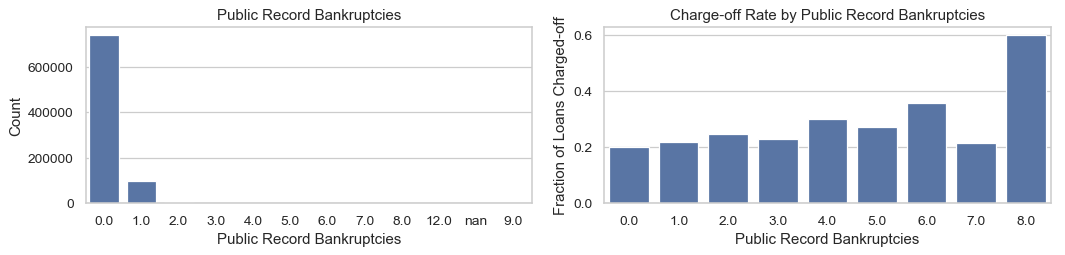

In [117]:
plot_var('pub_rec_bankruptcies', 'Public Record Bankruptcies', continuous=False)

# 6. More Pre-Processing

## 6.1 Convert loan status to 0/1 charge-off indicator

Change the response variable loan_status to a 0/1 variable, where 0 indicates fully paid and 1 indicates charge-off:

In [118]:
loans['charged_off'] = (loans['loan_status'] == 'Charged Off').apply(np.uint8)
loans.drop('loan_status', axis=1, inplace=True)

## 6.2 Create dummy variables

How many variables do we currently have?

In [119]:
loans.shape

(843934, 25)

If any categorical variables have missing values, we'll need to create NaN dummy variables for those. So first check which variables have missing data:

In [120]:
missing_fractions = loans.isnull().mean().sort_values(ascending=False) 
# Fraction of data missing for each variable

In [121]:
print(missing_fractions[missing_fractions > 0]) # Print variables that are missing data

mort_acc                0.056025
emp_length              0.052714
pub_rec_bankruptcies    0.000826
revol_util              0.000639
dti                     0.000114
dtype: float64


There are no categorical variables with missing values, and therefore we don't need any NaN dummy variables.

Create dummy variables for the categorical variables:

In [122]:
print(loans.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'verification_status', 'issue_d',
       'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies',
       'log_annual_inc', 'fico_score', 'log_revol_bal', 'charged_off'],
      dtype='object')


In [123]:
loans = pd.get_dummies(loans, columns=['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 
                                       'initial_list_status', 'application_type'],drop_first=True)

How many variables are there now?

In [124]:
loans.shape

(843934, 122)

Check our data with the new dummy variables:

In [125]:
loans.sample(5)

,loan_amnt,term,int_rate,installment,emp_length,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,log_annual_inc,fico_score,log_revol_bal,charged_off,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App
905371,14300.0,36,13.11,482.59,10.0,May-2013,14.92,1992,13.0,0.0,41.7,29.0,2.0,0.0,4.763435,667.0,3.821775,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
202264,9600.0,36,12.99,323.42,9.0,Mar-2014,10.88,1995,20.0,0.0,29.2,34.0,0.0,0.0,5.113947,687.0,4.262712,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
260824,4000.0,36,10.75,130.49,3.0,Oct-2010,21.33,1995,11.0,0.0,51.6,25.0,NaN,0.0,4.875067,707.0,4.449355,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
575069,3000.0,36,11.53,98.98,1.0,Apr-2015,21.24,2008,8.0,0.0,68.4,12.0,0.0,0.0,4.477136,677.0,3.157457,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
36304,20000.0,36,7.12,618.64,0.0,Oct-2014,3.77,1990,4.0,0.0,66.1,19.0,4.0,0.0,4.792399,682.0,4.082678,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## 6.3 Test/Train Split

We'll make our modeling problem more realistic by performing the train/test split based on the month that the loan was funded. That is, we'll use loans funded on earlier dates to predict whether future loans will charge-off. The variable issue_d includes the month and year that the loan was funded.

In [126]:
loans['issue_d'].sample(5)

905733    May-2013
865931    Aug-2013
155050    May-2014
259599    Nov-2010
267079    Mar-2010
Name: issue_d, dtype: object

Are there any missing values?

In [127]:
loans['issue_d'].isnull().any()

False

No. Let's convert the issue dates to datetime objects:

In [128]:
loans['issue_d'] = pd.to_datetime(loans['issue_d'])

In [129]:
loans['issue_d'].sample(5)

1471302   2016-06-01
434259    2015-09-01
862458    2013-08-01
405465    2015-10-01
58373     2014-10-01
Name: issue_d, dtype: datetime64[ns]

The new datetime values are all on the first day of the month. Check the summary statistics of the issue dates:

In [130]:
loans['issue_d'].describe()

count                  843934
unique                    133
top       2014-10-01 00:00:00
freq                    33699
first     2007-06-01 00:00:00
last      2018-06-01 00:00:00
Name: issue_d, dtype: object

There are only 124 unique issue dates over the 10-year period because we only have month/year information. In this particular dataset, the first loans were issued in June 2007, and the most recent loans were issued in September 2017. The busiest month was October 2014 with 33,699 loans funded in that month. What is the distribution of loans funded in each year?

Text(0.5,1,'Loans Funded per Year')

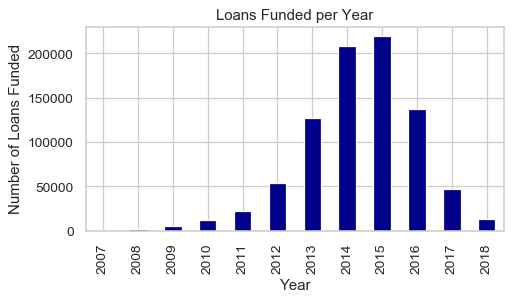

In [131]:
plt.figure(figsize=(6,3), dpi=90)
loans['issue_d'].dt.year.value_counts().sort_index().plot.bar(color='darkblue')
plt.xlabel('Year')
plt.ylabel('Number of Loans Funded')
plt.title('Loans Funded per Year')

We'll form the test set from the most recent 10% of the loans.

In [132]:
loans_train = loans.loc[loans['issue_d'] <  loans['issue_d'].quantile(0.9)]
loans_test =  loans.loc[loans['issue_d'] >= loans['issue_d'].quantile(0.9)]

Check that we properly partitioned the loans:

In [133]:
print('Number of loans in the partition:   ', loans_train.shape[0] + loans_test.shape[0])
print('Number of loans in the full dataset:', loans.shape[0])

Number of loans in the partition:    843934
Number of loans in the full dataset: 843934


What is the test size?

In [134]:
loans_test.shape[0] / loans.shape[0]

0.10822765761303609

About 10.8%. The partition looks good, so we can delete the original loans dataframe:

In [135]:
del loans

Let's look at the summary statistics of the issue dates in the train and test sets:

In [136]:
loans_train['issue_d'].describe()

count                  752597
unique                    111
top       2014-10-01 00:00:00
freq                    33699
first     2007-06-01 00:00:00
last      2016-08-01 00:00:00
Name: issue_d, dtype: object

In [137]:
loans_test['issue_d'].describe()

count                   91337
unique                     22
top       2016-10-01 00:00:00
freq                     8457
first     2016-09-01 00:00:00
last      2018-06-01 00:00:00
Name: issue_d, dtype: object

The training set includes loans from June 2007 to June 2016. The test set includes loans from July 2016 to September 2017.

Now we need to delete the issue_d variable, because it was not available before the loan was funded.

In [138]:
loans_train.drop('issue_d', axis=1, inplace=True)
loans_test.drop('issue_d', axis=1, inplace=True)

Now separate the predictor variables from the response variable:

In [139]:
y_train = loans_train['charged_off']
y_test = loans_test['charged_off']

In [140]:
X_train = loans_train.drop('charged_off', axis=1)
X_test = loans_test.drop('charged_off', axis=1)

In [141]:
del loans_train, loans_test

# 7. Linear Dependence of Charge-Off on the Predictors

On the training set, we compute the Pearson correlation,  F -statistic, and  p  value of each predictor with the response variable charged_off.

In [142]:
linear_dep = pd.DataFrame()

Pearson correlations:

In [143]:
for col in X_train.columns:
    linear_dep.loc[col, 'pearson_corr'] = X_train[col].corr(y_train)
linear_dep['abs_pearson_corr'] = abs(linear_dep['pearson_corr'])

F -statistics:

In [144]:
from sklearn.feature_selection import f_classif
for col in X_train.columns:
    mask = X_train[col].notnull()
    (linear_dep.loc[col, 'F'], linear_dep.loc[col, 'p_value']) = f_classif(pd.DataFrame(X_train.
                                                                                        loc[mask, col]), y_train.loc[mask])

Sort the results by the absolute value of the Pearson correlation:

In [145]:
linear_dep.sort_values('abs_pearson_corr', ascending=False, inplace=True)
linear_dep.drop('abs_pearson_corr', axis=1, inplace=True)

Reset the index:

In [146]:
linear_dep.reset_index(inplace=True)
linear_dep.rename(columns={'index':'variable'}, inplace=True)

View the results for the top 20 predictors most correlated with charged_off:

In [147]:
linear_dep.head(20)

,variable,pearson_corr,F,p_value
0,int_rate,0.256981,53214.862956,0.0
1,term,0.185930,26948.723259,0.0
2,fico_score,-0.140132,15074.703488,0.0
3,dti,0.131117,13164.461420,0.0
4,mort_acc,-0.077557,4268.204301,0.0
5,log_annual_inc,-0.074319,4179.958523,0.0
6,sub_grade_A4,-0.068874,3587.073464,0.0
7,revol_util,0.066928,3384.347392,0.0
8,sub_grade_A5,-0.066150,3307.702556,0.0
9,home_ownership_RENT,0.064652,3159.046365,0.0


The variables most linearly correlated with charged_off are the interest rate, loan period (term), FICO score, debt-to-income ratio, number of mortgages, income, the loan grade, and the loan amount.

Now view the results for the 20 least correlated predictors:

In [148]:
linear_dep.tail(20)

,variable,pearson_corr,F,p_value
100,addr_state_MD,0.003160,7.517787,0.006109
101,addr_state_ME,-0.003154,7.484333,0.006224
102,purpose_house,0.003070,7.091019,0.007747
103,sub_grade_C2,0.002919,6.410310,0.011346
104,purpose_renewable_energy,0.002745,5.669492,0.017263
105,addr_state_KY,0.002496,4.686967,0.030393
106,addr_state_SD,0.002490,4.667887,0.030732
107,addr_state_ID,0.002365,4.208439,0.040224
108,addr_state_AZ,-0.002059,3.191712,0.074013
109,purpose_educational,-0.002009,3.038363,0.081318


It looks like the borrower's state of residence, the revolving balance, and several of the loan purposes are irrelevant for predicting charge-off.

# 8. Model Training and Testing

We implement machine learning pipelines consisting of one or more of the following steps, depending on the particular model:

1. Mean imputation of missing values
2. Dimension reduction using linear discriminant analysis (LDA)
3. Data standardization: rescaling to zero mean and unit variance
4. The chosen model

We will evaluate and compare the following models using a cross-validated AUROC score on the training set:

1. Logistic regression with SGD training
2. Random forest
3. k-nearest neighbors
We'll perform some hyperparameter tuning for each model to choose the most promising model, then more carefully tune the hyperparameters of the best-performing model.

In [149]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

## 8.1 Logistic regression with SGD training

The SGDClassifier estimator in scikit-learn implements linear classifiers (SVM, logistic regression, and others) with stochastic gradient descent (SGD) training. A particular linear classifier is chosen through the loss hyperparameter. Because we want to predict the probability of charge-off, we choose logistic regression (a probabilistic classifier) by setting loss = 'log'.

In [150]:
from sklearn.linear_model import SGDClassifier

The machine learning pipeline:

In [151]:
pipeline_sgdlogreg = Pipeline([
    ('imputer', Imputer(copy=False)), # Mean imputation by default
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

A small grid of hyperparameters to search over:

In [152]:
param_grid_sgdlogreg = {
    'model__alpha': [10**-5, 10**-2, 10**1],
    'model__penalty': ['l1', 'l2']
}

Create the search grid object:

In [153]:
grid_sgdlogreg = GridSearchCV(estimator=pipeline_sgdlogreg, param_grid=param_grid_sgdlogreg, scoring='roc_auc', 
                              n_jobs=1, pre_dispatch=1, cv=5, verbose=1, return_train_score=False)

Conduct the grid search and train the final model on the whole dataset:

In [154]:
grid_sgdlogreg.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 12.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=False, missing_values='NaN', strategy='mean', verbose=0)), ('scaler', StandardScaler(copy=False, with_mean=True, with_std=True)), ('model', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       e...ty='l2', power_t=0.5, random_state=1, shuffle=True,
       tol=0.001, verbose=0, warm_start=True))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'model__alpha': [1e-05, 0.01, 10], 'model__penalty': ['l1', 'l2']},
       pre_dispatch=1, refit=True, return_train_score=False,
       scoring='roc_auc', verbose=1)

Mean cross-validated AUROC score of the best model:

In [155]:
grid_sgdlogreg.best_score_

0.71278777269982518

Best hyperparameters:

In [156]:
grid_sgdlogreg.best_params_

{'model__alpha': 0.01, 'model__penalty': 'l2'}

## 8.2 Random Forest Classifier

Next we train a random forest model. Note that data standardization is not necessary for a random forest.

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
pipeline_rfc = Pipeline([
    ('imputer', Imputer(copy=False)),
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

The random forest takes very long to train, so we don't test different hyperparameter choices. We'll still use GridSearchCV for the sake of consistency.

In [159]:
param_grid_rfc = {
    'model__n_estimators': [50] # The number of randomized trees to build
}

The AUROC will always improve (with decreasing gains) as the number of estimators increases, but it's not necessarily worth the extra training time and model complexity.

In [160]:
grid_rfc = GridSearchCV(estimator=pipeline_rfc, param_grid=param_grid_rfc, scoring='roc_auc', n_jobs=1, pre_dispatch=1, cv=5, verbose=1, return_train_score=False)

In [161]:
grid_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=False, missing_values='NaN', strategy='mean', verbose=0)), ('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_im...stimators=10, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'model__n_estimators': [50]}, pre_dispatch=1,
       refit=True, return_train_score=False, scoring='roc_auc', verbose=1)

Mean cross-validated AUROC score of the random forest:

In [162]:
grid_rfc.best_score_

0.69505249578525441

Not quite as good as logistic regression, at least according to this metric.

## 8.3 k-nearest neighbors

Next we try k-nearest neighbors. We need to reduce the number of variables to 10 or fewer (reference) for kNN to perform well. We'll use LDA for dimension reduction. The number of component variables to keep is a hyperparameter.

In [163]:
from sklearn.neighbors import KNeighborsClassifier

In [164]:
pipeline_knn = Pipeline([
    ('imputer', Imputer(copy=False)),
    ('scaler', StandardScaler(copy=False)),
    ('lda', LinearDiscriminantAnalysis()),
    ('model', KNeighborsClassifier(n_jobs=-1))
])

In [165]:
param_grid_knn = {
    'lda__n_components': [3, 9], # Number of LDA components to keep
    'model__n_neighbors': [5, 25, 125] # The 'k' in k-nearest neighbors
}

In [ ]:
grid_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, scoring='roc_auc', 
                        n_jobs=1, pre_dispatch=1, cv=5, verbose=1, return_train_score=False)

In [ ]:
grid_knn.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


Mean cross-validated AUROC score of the best model:

In [ ]:
grid_knn.best_score_

Best hyperparameters:

In [ ]:
grid_knn.best_params_

Only 3 LDA components are necessary for kNN to perform almost as well as logistic regression!

## 8.4 Tune hyperparameters on the chosen model more finely

The three models performed quite similarly according to the AUROC:

In [ ]:
print('Cross-validated AUROC scores')
print(grid_sgdlogreg.best_score_, '- Logistic regression')
print(grid_rfc.best_score_, '- Random forest')
print(grid_knn.best_score_, '- k-nearest neighbors')

Logistic regression squeaked out ahead, and coupled with the fact that SGDClassifier trains much faster than the other two models, we'll select logistic regression as our final model. Now we'll tune the hyperparameters more finely.

In [ ]:
param_grid_sgdlogreg = {
    'model__alpha': np.logspace(-4.5, 0.5, 11), # Fills in the gaps between 10^-5 and 10^1
    'model__penalty': ['l1', 'l2']
}

print(param_grid_sgdlogreg)

In [ ]:
grid_sgdlogreg = GridSearchCV(estimator=pipeline_sgdlogreg, param_grid=param_grid_sgdlogreg, 
                              scoring='roc_auc', n_jobs=1, pre_dispatch=1,cv=5, verbose=1, 
                              return_train_score=False)

In [ ]:
grid_sgdlogreg.fit(X_train, y_train)

Mean cross-validated AUROC score of the best model:

In [ ]:
grid_sgdlogreg.best_score_

Best hyperparameters:

In [ ]:
grid_sgdlogreg.best_params_

By some coincidence, the optimal hyperparameters here are the same as from our first grid search for logistic regression!

## 8.5 Test set evaluation

Now we can finally see how our chosen model performs on the test data (the most recent 10% of the loans).

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
y_score = grid_sgdlogreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_score)

The test set AUROC score is somewhat lower than the cross-validated score (0.713).

## 8.6 Granident Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
grid_gbreg = GradientBoostingRegressor(estimator=pipeline_sgdlogreg, param_grid=param_grid_sgdlogreg, 
                              scoring='roc_auc', n_jobs=1, pre_dispatch=1,cv=5, verbose=1, 
                              return_train_score=False)
models=[] 
models.append(("GradientBoostingRegressor", 
               GradientBoostingRegressor(loss='ls',learning_rate=0.1,n_estimators=100,
                                         subsample=1,min_samples_split=2,min_samples_leaf=1)))

In [4]:
for reg_name, reg in models:  
    reg.fit(X_train, y_train)  #进行训练，拟合
    xy_lst = [(X_train, y_train),  (X_test, y_test)]  #下标为0的X_train,Y_train;下标为1的X_test, Y_test
    for i in range(len(xy_lst)):  #再次遍历
        X_part = xy_lst[i][0]  
        Y_part = xy_lst[i][1]  
        Y_pred = reg.predict(X_part)  
        print(i)
        print('解释方差得分：',metrics.explained_variance_score(Y_part,Y_pred))  # 解释方差得分
        print('平均绝对误差：',metrics.mean_absolute_error(Y_part, Y_pred))  # 平均绝对误差
        print('均方误差：',metrics.mean_squared_error(Y_part, Y_pred))  # 均方误差

NameError: name 'X_train' is not defined

# 9. Conclusion

We applied machine learning methods to predict the probability that a requested loan on LendingClub will charge off. After training and evaluating three different models (logistic regression, random forest, and k-nearest neighbors), we found that all three performed similarly according to a cross-validated AUROC score on the training data. We selected logistic regression (with ridge penalty) because it was the fastest model to train, and this model obtained an AUROC score of 0.689 on a test set consisting of the most recent 10% of the loans.

This model, while far from perfect, can provide a somewhat informed prediction of the likelihood that a loan will charge off, using only data available to potential investors before the loan is fully funded.

We also found that, according to linear measures of correlation between the predictors and the response, the most important variables for predicting charge-off are the loan interest rate and term, and the borrower's FICO score and debt-to-income ratio.